In [10]:
import Bio as bio
from Bio import SeqIO
from Bio.Blast.Applications import NcbiblastpCommandline as BlastP
from Bio.Blast import NCBIWWW 
from Bio.Blast import NCBIXML
from Bio import SearchIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
import copy

In [108]:
bot_amidine_fasta = SeqIO.read("Sequences/Amidine/Bottromycin/Fasta.fa","fasta")

In [111]:
result_handle = NCBIWWW.qblast("blastp", "nr", bot_amidine_fasta.seq, hitlist_size = 1000) 

In [113]:
with open("blast_result.xml", "w+") as file:
    file.write(result_handle.read())
    result_handle.close()

In [114]:
result_handle = open("blast_result.xml", "r")
blast_records = NCBIXML.read(result_handle)

E_threshold = 0.001
ct = 0
for alignment in blast_records.alignments:
    for hsp in alignment.hsps:
        ++ct
        #if hsp.expect < E_threshold:
            #print("\n")
            #print("sequence: {}".format(alignment.title[:100]))


In [123]:
print("Sequence and sequence ID used in the blast search:",bot_amidine_fasta.id, bot_amidine_fasta.seq)
raw_online_fasta = SeqIO.parse("Sequences/Amidine/Bottromycin/seqdump.fa", "fasta")
online_sequence_records = [seq for seq in raw_online_fasta] #Sequences that were derived from the online blast search tool
print("\nNumber of sequences from online Blast Search:", len(online_sequence_records))

online_blast_ids = [online_sequence_record.id for online_sequence_record in online_sequence_records]

blast_presult = SearchIO.read("blast_result.xml", 'blast-xml')
python_seq_records = []
for alignment in blast_presult:
    for hsp in alignment:
        seq = Seq(hsp.hit.seq.ungap())
        seq_record = SeqRecord(seq, id=hsp.hit.id.split("|")[1])
        python_seq_records.append(seq_record)
i=0      
for python_seq_record in python_seq_records[899:]:
    print("seq ID:", python_seq_record.id, python_seq_record.id in online_blast_ids)    
    if(python_seq_record.id in online_blast_ids):
        #print(online_blast_ids.index(python_seq_record.id))
        i+=1
print(i)
    #    index = online_blast_ids.index(python_seq_record.id)
    #    alignments = pairwise2.align.globalxx(python_seq_record.seq, online_sequence_records[index].seq[0:200])
     #   print("\n Alignment for {}:".format(python_seq_record.id))
      #  print(format_alignment(*alignments[0]))

Sequence and sequence ID used in the blast search: AFV25483.1 MRLTDAEGALCSRSSGKGLGHRSMASALFESAEHYHLDWRRDPRASEAEFLPGREIAGQDTARRSALLRRLGGIMPDAPVLTRTYRPVEETLTGRADHGPAGRPHRHPVFLRDGGYRNWPHPDDDRSFQPLWHYTSSAGYAAGATVHEALVHAVNELIERDAWSYQLARSYFGLPGEGPELRVVDHDTLPAELRELTGTVEEVREAPVLIVDITCDTGVPAYVVCDARSREEVRLIGSGASPVRTYALQRALLEYLQVRTMFEHGPVDADTEAGQIATALARYPRHLAAARFDVGQLPHERRAFDADDGLPAAASPEQLLRHLVDRLRDLGVDVHHRVLTPPGSVTVVDVVAPGLEMFDKARAGYPVLPTGRLGERLRPRKDHERGHGVDHGKDRGGAPR

Number of sequences from online Blast Search: 1000
seq ID: RDJ12630.1 True
seq ID: WP_083186407.1 False
seq ID: WP_157063298.1 False
seq ID: WP_260006532.1 False
seq ID: RZN33543.1 False
seq ID: MBT8998357.1 True
seq ID: WP_209673731.1 True
seq ID: MBT8800828.1 True
seq ID: WP_259696898.1 True
seq ID: WP_187519240.1 False
seq ID: MCK9318291.1 False
seq ID: MBT8921924.1 True
seq ID: AKU15595.1 False
seq ID: MBI4612747.1 False
seq ID: OPX76333.1 True
seq ID: MCC2662662.1 True
seq ID: WP_080266151.1 False
seq ID: WP_048185145.1 False

In [57]:
from Bio import Entrez
Entrez.api_key = "a8f78b4657d608ac2e519266eede38d56408"
Entrez.email = "ericgemmell@gmail.com"

# Trying to convert a Fasta with DNA to aa


In [21]:
DNA_Fasta_Seq = SeqIO.parse("DNA_Fasta.fa","fasta")
DNA_Seqs = [seq for seq in DNA_Fasta_Seq]
tenth_seq = DNA_Seqs[10].translate()

bot_amidine_fasta = SeqIO.read("Sequences/Amidine/Bottromycin/Fasta.fa","fasta")
alignments = pairwise2.align.globalxx(bot_amidine_fasta.seq, tenth_seq.seq)
print(DNA_Seqs[10].id)
print(format_alignment(*alignments[0]))

CP090082.1:339535-340662
MRL-TDAEGALCSR-------SSG--KGLGHRSMA--S---ALFESA-EHYHLDWRR----DPRA--------S----EA-E-FLPG-RE-IAG-QDTARRSALLR---RLGGIMP-DAPVLT--RT-YRPVEET-LTGRADHGPAGRPHR-----HPVFLRDGG-YR-----NWP-------HPDDDRSFQP----LWH--YTSSA--GYA-A-GA-TVH--EALV-HAV-NEL-IERDAWSYQLARSYFGLPGEGPELRVVD-H------------DTL---PAELR-ELTG-TVEEVRE----APVL--IVD---I-----TCDTGV----P---AYVVCDARSREEVRLIGS-GAS--P-VR---T--YALQ-----RALL--EYLQVR-T--M---FEHGPVDADTEAGQIAT-----A-L-AR---YPR-HLAAA-R---FDVG--Q-LPH---ER-RA---FDADDGLPAAAS----PE-QL-LRH------LVD--RLR-DL-GV-DVHHRV-----LTPPG-SV----TVVDV--VAPG--LE---MFDKA-RA------GYP-VLPTGRLGERLRPRK-DHERGHGVD-HGKD--RG------GAPR---
    |     |  |       |||  ||||       |   |||| | |||          |  |        |    |  | |    || |   |       ||    |       |  ||   |  |     | |                   | |       |      | |       || || ||      |    | ||   |   | |  |    |||  ||  ||  |||||||  |    | |      |     |            | |   |     ||   |          | |   |     |     |  |      |   |  |    |     | 

# Get SeqDump files and check for unique sequences

In [4]:
import glob
import tqdm
seqdump_dirs = glob.glob("**/**HMMER_seqdump.fa",recursive = True)

print(seqdump_dirs)
unique_sequences = []
i = 0
for seqdump_dir in tqdm.tqdm(seqdump_dirs):
    seqrec_iter = SeqIO.parse(seqdump_dir,"fasta")
    for seqrec in seqrec_iter:
        i += 1
        if seqrec.id not in unique_sequences:
            unique_sequences.append(seqrec.id)
print(i)

['raw_sequences/Amidine/Lasso_peptides/HMMER_seqdump.fa', 'raw_sequences/Amidine/Jesko_but_unknown/HMMER_seqdump.fa', 'raw_sequences/Amidine/Bottromycin/HMMER_seqdump.fa', 'raw_sequences/Azoline/Cyanobactins/PatD_HMMER_seqdump.fa', 'raw_sequences/Azoline/Cyanobactins/TruD_HMMER_seqdump.fa', 'raw_sequences/Azoline/PZN/HMMER_seqdump.fa', 'raw_sequences/Azoline/Muscoride/HMMER_seqdump.fa', 'raw_sequences/Azoline/Sag/HMMER_seqdump.fa', 'raw_sequences/Azoline/Thiostrepton/HMMER_seqdump.fa', 'raw_sequences/Azoline/Mccb17/HMMER_seqdump.fa', 'raw_sequences/Azoline/Bottromycin/HMMER_seqdump.fa', 'raw_sequences/Azoline/Thiopeptide_Lactazole/HMMER_seqdump.fa', 'raw_sequences/Azoline/Heterocycloanthracins/HMMER_seqdump.fa', 'raw_sequences/Azoline/Goadsporin/HMMER_seqdump.fa', 'raw_sequences/Thioamide/Thioholgamide/HMMER_seqdump.fa', 'raw_sequences/Thioamide/Jesko/HMMER_seqdump.fa', 'raw_sequences/Thioamide/Thioviridamide/HMMER_seqdump.fa', 'raw_sequences/Thioamide/Jesko2/HMMER_seqdump.fa', 'raw_se

100%|██████████| 19/19 [00:01<00:00, 12.34it/s]

22903


In [11]:
print(len(unique_sequences))

19405


## Number of sequences per file

In [9]:
import glob
seqdump_dirs = glob.glob("**/**seqdump.txt",recursive = True)

for seqdump_dir in seqdump_dirs:
    i = 0
    seqrec_iter = SeqIO.parse(seqdump_dir,"fasta")
    for seqrec in seqrec_iter:
        i += 1
    if(i<200):
        print("\n{} has {} sequences".format(seqdump_dir,i))
    


Sequences/Amidine/Jesko_but_unknown/seqdump.txt has 18 sequences

Sequences/Azoline/PZN/seqdump.txt has 120 sequences

Sequences/Azoline/Mccb17/seqdump.txt has 64 sequences

Sequences/Azoline/Bottromycin/seqdump.txt has 27 sequences


# Pairwise percent identity 
## Works for pairwise aligned sequences

In [29]:
#Quick bit of code that determines the identity score by a really crude method, which I am not even sure is correct
#because it is consistently higher than Blast result percentage identity, but hey it's close enough
blastp_sequences = [seq for seq in SeqIO.parse("raw_sequences/Azoline/Bottromycin/seqdump.txt","fasta")]

tblastn_DNA_sequences = [seq for seq in SeqIO.parse("raw_sequences/Azoline/Bottromycin/wgs_DNA_streptomycetateae_seqdump.txt","fasta")]
tblastn_sequences = [seq.translate() for seq in tblastn_DNA_sequences]

seq1 = blastp_sequences[0]
seq2 = tblastn_sequences[0]

alignments = pairwise2.align.globalxx(seq1.seq, seq2.seq)

print(format_alignment(*alignments[0]))
print(alignments[0].score/max(len(seq1),len(seq2)))

ML-EATATECELREVVHRSYPSD-RTVTVRCTVRPAEGT-AQADGYGTATTEAVARAKALSEAVERLVACTPFATVARPPTTPA---PGS-GSGPVPPFPAAGVRTAPD-GCAS-RE-YRPLS-GDG-PRRVPLYWSSPWV-AGE-ELRAGTLS-AAEARLSSTVGWAVAPTPEA-ALRGALLELTELIDYGVFLHRRLAGPARPR-SAGDE-TLVVPLGGAV--RTPT-VLAVAYGRGRLMPATGLGCGAS-RA-EATDRALLELAQAETMWRSNPTAEPAERFFLRRFERWPLLT-RCATLDFELSDLSGLDGLSGLDGLSRL-DGLS-RLDHPSDLNDPAGR--PA--P--YDDGPH-PASPLEELEAGGIT-VWADSGAVDISGPDIPRTRLCFAHVVSDPQPLLGLVRAGIPVFDTGEVRRTLDPSRRDAHRDTPRGAPRDAARDRSADRGPAGRGRQGRRSA
|  |||||||||||||||||||  ||||||||||||||  |||||||||||||||||||||||||||||||||||||||| | |   ||  |||||||||||||||||  |||  |  ||||  | | ||||||||||||  ||  |||||||  |||||||||||||||||||  |||||||||||||||||||||||||||| | ||||  ||||||||    |||  |||||||||||||||||||||  |  ||||||||||||||||||||||||||||||||||||||||  |||||||              |    | |    | | |     || |  ||  |  |||||  |||||||||||||  |||||||||||||||||||||||||||||||||||||||||||||||||||||||                   |   | |          |
M-REATATECELREVVHRSYPS-ERTVTVRCTVRPAEG-SAQADGYGTATTEAVARAKALSE

# "Percentage" identity matrix
### CODE IS VERY SLOW, Better version below

In [55]:
#THIS CODE IS VERY SLOW
import numpy as np
from tqdm import tqdm

def perc_identity(alignment,seq1,seq2):
    return alignment[0].score/max(len(seq1),len(seq2))

def perc_identity_matrix(sequences):
    with tqdm(total=pow(len(sequences),2)) as pbar:
        matrix = np.zeros((len(sequences),len(sequences)))
        for i in range(len(sequences)):
            matrix[i,i] = 1
            pbar.update(1)
            for j in range(i):
                alignment = pairwise2.align.globalxx(sequences[i].seq, sequences[j].seq)
                matrix[i,j] = perc_identity(alignment,sequences[i].seq,sequences[j].seq)
                matrix[j,i] = matrix[i,j]
                pbar.update(2)
        
    return matrix


tblastn_DNA_sequences = [seq for seq in SeqIO.parse("raw_sequences/Azoline/Bottromycin/wgs_DNA_streptomycetateae_seqdump.txt","fasta")]
tblastn_sequences = [seq.translate() for seq in tblastn_DNA_sequences]
print(len(tblastn_sequences))
identity_matrix = perc_identity_matrix(tblastn_sequences)
print(identity_matrix)


42


100%|██████████| 1764/1764 [00:46<00:00, 37.86it/s]

[[1.       1.       1.       ... 0.167979 0.167979 0.167979]
 [1.       1.       1.       ... 0.167979 0.167979 0.167979]
 [1.       1.       1.       ... 0.167979 0.167979 0.167979]
 ...
 [0.167979 0.167979 0.167979 ... 1.       1.       1.      ]
 [0.167979 0.167979 0.167979 ... 1.       1.       1.      ]
 [0.167979 0.167979 0.167979 ... 1.       1.       1.      ]]


1.0


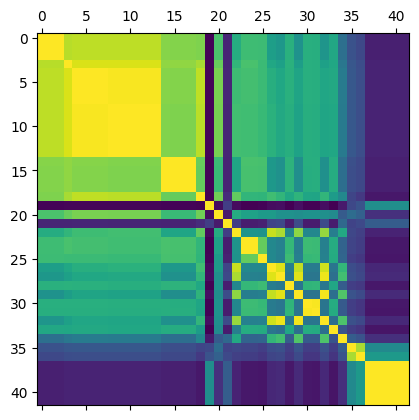

In [51]:
import matplotlib.pyplot as plt

print(identity_matrix[0,0])
plt.matshow(identity_matrix)

23


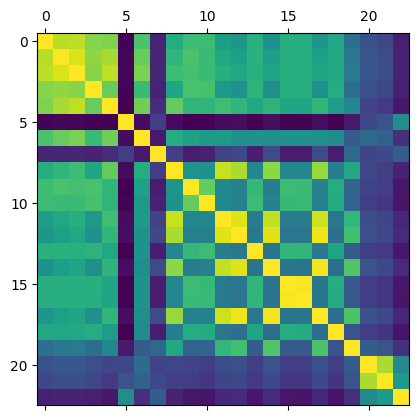

In [83]:
def perc_identity_cutoff(sequences,matrix,cutoff=1):
    dissimilar_sequences = []
    indexes_to_del = []
    dissimilar_sequences.append(sequences[0])
    for i in range(1,matrix.shape[0]):
        if(matrix[:i,i].max() < cutoff):
            dissimilar_sequences.append(sequences[i])
        else:
            indexes_to_del.append(i)
    matrix = np.delete(matrix, indexes_to_del, axis = 0)
    matrix = np.delete(matrix, indexes_to_del, axis = 1)
    return dissimilar_sequences, matrix

unique_sequences, unique_matrix = perc_identity_cutoff(tblastn_sequences, identity_matrix, cutoff=0.99)
plt.matshow(unique_matrix)
print(len(unique_sequences))

In [73]:
def perc_identity(seq1,seq2): #percentage identity between two aligned sequences
    
    return alignment[0].score/max(len(seq1),len(seq2))

0.9893048128342246


In [10]:
!pip install pylev levenshtein

  Using cached Levenshtein-0.20.8-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (175 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 314.8 kB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [36]:
import pylev
import Levenshtein
import tqdm
import matplotlib.pyplot as plt
import numpy as np

def get_sequences(file_name): #Returns a list of seqRecords from filename instead of iterable like SeqIO would
    return [seq for seq in SeqIO.parse(file_name,"fasta")]

In [7]:
a = 'carlos'
b = 'b arlos'

pylev.levenshtein(a, b)

2

In [28]:
#unique_sequences = get_sequences("raw_sequences/Azoline/Bottromycin/seqdump.txt")
tblastn_DNA_sequences = [seq for seq in SeqIO.parse("raw_sequences/Azoline/Bottromycin/wgs_DNA_streptomycetateae_seqdump.txt","fasta")]
unique_sequences = [seq.translate() for seq in tblastn_DNA_sequences]

seq1 = str(unique_sequences[0].seq)
seq2 = str(unique_sequences[1].seq)

In [29]:
pylev.levenshtein(seq1, seq2)

0

In [31]:
similarity_matrix = []

for i in tqdm.tqdm(range(len(unique_sequences))):
    row = []
    for j in range(len(unique_sequences)):
        seq1 = str(unique_sequences[i].seq)
        seq2 = str(unique_sequences[j].seq)
        similarity = pylev.levenschtein(seq1, seq2)
        row.append(similarity)
    similarity_matrix.append(row)

        

100%|██████████| 42/42 [01:22<00:00,  1.96s/it]


In [38]:
m = np.array(similarity_matrix)

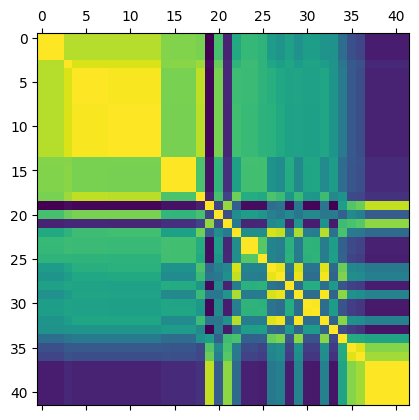

In [39]:
plt.matshow(-m)

## Checking the Size of different YcaO sequences I have collected

In [1]:
import os
import glob
from Bio import SeqIO
from tqdm.auto import tqdm
import pylev
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
seqdump_dirs = glob.glob("../**/**Fasta.fa",recursive = True)
#print(seqdump_dirs)
for seqdump_dir in seqdump_dirs:
    seqrec = [seqrec for seqrec in SeqIO.parse(seqdump_dir,"fasta")][0]
    print(f"{seqdump_dir} has {len(seqrec.seq)} aa")

../raw_sequences/Amidine/Lasso_peptides/Fasta.fa has 588 aa
../raw_sequences/Amidine/Jesko_but_unknown_outgroup_POTENTIALLY_IGNORE_DUE_TO_WEIRD_ALIGNMENT/outgroup_sequence_Fasta.fa has 562 aa
../raw_sequences/Amidine/Jesko_but_unknown/Fasta.fa has 374 aa
../raw_sequences/Amidine/Bottromycin/Fasta.fa has 400 aa
../raw_sequences/Azoline/PZN_SEQUENCE_MAY_BE_WRONG/Fasta.fa has 330 aa
../raw_sequences/Azoline/Goadsporin/Fasta.fa has 766 aa
../raw_sequences/Azoline/Thiopeptide_Lactazole/Fasta.fa has 688 aa
../raw_sequences/Azoline/Thiostrepton/Fasta.fa has 681 aa
../raw_sequences/Azoline/Sag/Fasta.fa has 452 aa
../raw_sequences/Azoline/Cyanobactins/PatD_Fasta.fa has 784 aa
../raw_sequences/Azoline/Bottromycin/Fasta.fa has 434 aa
../raw_sequences/Azoline/Muscoride/Fasta.fa has 781 aa
../raw_sequences/Azoline/Heterocycloanthracins/Fasta.fa has 649 aa
../raw_sequences/Azoline/Mccb17_SEQUENCE_MAY_BE_WRONG/Fasta.fa has 340 aa
../raw_sequences/Azoline/PZN_updated/Fasta.fa has 649 aa
../raw_sequenc

## Checking what percentage of my sequences are in the interpro YcaO annotated YcaO set

In [5]:
import os
import glob
from Bio import SeqIO
from tqdm.auto import tqdm
import pylev
import matplotlib.pyplot as plt
import numpy as np

Get all my sequences

In [34]:
seqdump_dirs = glob.glob("../**/**seqdump.fa",recursive = True)
interpro_seqrecs_dir = "../raw_sequences/interpro_all_YcaO_domain_sequences.txt"

unique_sequence_ids = []
unique_sequences = []
all_sequences = []

num_sequences = 0
seqrecs_list = []
for seqdump_dir in seqdump_dirs:
    seqrecs = [seqrec for seqrec in SeqIO.parse(seqdump_dir,"fasta")]
    print(f"{seqdump_dir} has {len(seqrecs)} sequences")
    seqrecs_list.append(seqrecs)

for i in tqdm(range(len(seqdump_dirs)), desc='Loading all sequences'):
    seqrecs = seqrecs_list[i]
    seqdump_dir = seqdump_dirs[i]
    YcaO_type = seqdump_dir.split("/")[-3]
    YcaO_subclass = seqdump_dir.split("/")[-2]
    #print(YcaO_type,YcaO_subclass)
    pos_in_file = 0
    for seqrec in seqrecs[:]:
        num_sequences += 1
        pos_in_file += 1
        seqrec.full_id = f"{YcaO_type}_{YcaO_subclass}_{seqrec.id}"
        seqrec.pos_in_file = pos_in_file
        all_sequences.append(seqrec)
        if seqrec.id not in unique_sequence_ids:
            unique_sequence_ids.append(seqrec.id)
            unique_sequences.append(seqrec)
            

# '''OVERWRITING UNIQUE SEQUENCES FOR SPEED OF PROCESSING'''
# unique_sequences = [seqrec for seqrec in SeqIO.parse("../raw_sequences/Azoline/Mccb17/HMMER_seqdump.fa","fasta")]     
print(f'From {num_sequences} searched sequences {len(unique_sequences)} are unique. Loaded in unique_sequences variable.')

#Get all the interpro sequences
interpro_seqrecs = [seqrec for seqrec in SeqIO.parse(interpro_seqrecs_dir,"fasta")]
interpro_ids = [seqrec.id for seqrec in interpro_seqrecs]

../raw_sequences/Amidine/Lasso_peptides/HMMER_seqdump.fa has 1665 sequences
../raw_sequences/Amidine/Jesko_but_unknown_outgroup_POTENTIALLY_IGNORE_DUE_TO_WEIRD_ALIGNMENT/outgroup_sequence_HMMER_seqdump.fa has 1779 sequences
../raw_sequences/Amidine/Jesko_but_unknown/HMMER_seqdump.fa has 14 sequences
../raw_sequences/Amidine/Bottromycin/HMMER_seqdump.fa has 273 sequences
../raw_sequences/Azoline/PZN_SEQUENCE_MAY_BE_WRONG/HMMER_seqdump.fa has 211 sequences
../raw_sequences/Azoline/Goadsporin/HMMER_seqdump.fa has 1750 sequences
../raw_sequences/Azoline/Thiopeptide_Lactazole/HMMER_seqdump.fa has 1595 sequences
../raw_sequences/Azoline/Thiostrepton/HMMER_seqdump.fa has 1205 sequences
../raw_sequences/Azoline/Sag/HMMER_seqdump.fa has 576 sequences
../raw_sequences/Azoline/Cyanobactins/PatD_HMMER_seqdump.fa has 1854 sequences
../raw_sequences/Azoline/Cyanobactins/TruD_HMMER_seqdump.fa has 1858 sequences
../raw_sequences/Azoline/Bottromycin/HMMER_seqdump.fa has 5 sequences
../raw_sequences/Azo

Loading all sequences: 100%|██████████| 21/21 [00:01<00:00, 20.68it/s]


From 26077 searched sequences 5531 are unique. Loaded in unique_sequences variable.


In [35]:
#unique_ids_processed = [seq_id.split("_")[0] for seq_id in unique_sequence_ids]

interpro_ids_processed = [seq_id.split("|")[0] for seq_id in interpro_ids]
non_interpro_sec = []
interpro_sec = []

interpro_seq_counter = 0
non_interpro_seq_counter = 0

for seqrec in all_sequences:
    accession_code = seqrec.id.split("_")[0]
    if(accession_code in interpro_ids_processed):
        interpro_seq_counter += 1
        interpro_sec.append(seqrec)
    else:
        non_interpro_seq_counter += 1
        non_interpro_sec.append(seqrec)
        

print(f"{interpro_seq_counter} were in the YcaO database, {non_interpro_seq_counter} were outside")

21656 were in the YcaO database, 4421 were outside


In [37]:
for seqrec in non_interpro_sec: 
    print(seqrec.pos_in_file, seqrec.full_id)

1 Amidine_Lasso_peptides_A0A4Q7KGJ6_9PSEU
2 Amidine_Lasso_peptides_A0A3N4US38_9ACTN
3 Amidine_Lasso_peptides_A0A1Q4V897_9ACTN
4 Amidine_Lasso_peptides_A0A0W7X898_9ACTN
5 Amidine_Lasso_peptides_A0A498E1X8_9ACTN
6 Amidine_Lasso_peptides_A0A2P8Q2Z0_9ACTN
7 Amidine_Lasso_peptides_A0A2T0T716_9PSEU
8 Amidine_Lasso_peptides_A0A4R5C4R1_9ACTN
9 Amidine_Lasso_peptides_A0A1Q4VYX8_9ACTN
10 Amidine_Lasso_peptides_A0A250VGI6_STROL
11 Amidine_Lasso_peptides_A0A428XWP7_9ACTN
12 Amidine_Lasso_peptides_S3B2X7_9ACTN
13 Amidine_Lasso_peptides_A0A4R7VJQ3_9PSEU
14 Amidine_Lasso_peptides_A0A0X3X2G4_9ACTN
15 Amidine_Lasso_peptides_A0A1H6D159_9ACTN
16 Amidine_Lasso_peptides_A0A6H9ZAD7_9ACTN
17 Amidine_Lasso_peptides_A0A3D9SSG2_9ACTN
18 Amidine_Lasso_peptides_A0A6I4MP45_9ACTN
19 Amidine_Lasso_peptides_A0A2T0Q2M5_9ACTN
20 Amidine_Lasso_peptides_A0A6I4PXS1_9ACTN
21 Amidine_Lasso_peptides_A0A1M7RP80_9ACTN
22 Amidine_Lasso_peptides_J7LAV5_NOCAA
23 Amidine_Lasso_peptides_Q82R84_STRAW
24 Amidine_Lasso_peptides_F8K1X3

In [38]:
for seqrec in interpro_sec: 
    print(seqrec.pos_in_file, seqrec.full_id)

1 Amidine_Jesko_but_unknown_outgroup_POTENTIALLY_IGNORE_DUE_TO_WEIRD_ALIGNMENT_A0A4Q0YMK5_9GAMM
2 Amidine_Jesko_but_unknown_outgroup_POTENTIALLY_IGNORE_DUE_TO_WEIRD_ALIGNMENT_W0VE14_9BURK
3 Amidine_Jesko_but_unknown_outgroup_POTENTIALLY_IGNORE_DUE_TO_WEIRD_ALIGNMENT_A0A223KNH3_9BACI
4 Amidine_Jesko_but_unknown_outgroup_POTENTIALLY_IGNORE_DUE_TO_WEIRD_ALIGNMENT_A0A2A8S842_9BACI
5 Amidine_Jesko_but_unknown_outgroup_POTENTIALLY_IGNORE_DUE_TO_WEIRD_ALIGNMENT_A0A0M0GDF0_SPOGL
6 Amidine_Jesko_but_unknown_outgroup_POTENTIALLY_IGNORE_DUE_TO_WEIRD_ALIGNMENT_A0A1Y0ITH4_9BACL
7 Amidine_Jesko_but_unknown_outgroup_POTENTIALLY_IGNORE_DUE_TO_WEIRD_ALIGNMENT_A0A0U2VAB5_9BACL
8 Amidine_Jesko_but_unknown_outgroup_POTENTIALLY_IGNORE_DUE_TO_WEIRD_ALIGNMENT_A0A2W1L201_9BACL
9 Amidine_Jesko_but_unknown_outgroup_POTENTIALLY_IGNORE_DUE_TO_WEIRD_ALIGNMENT_A0A1G9RW01_9BACI
10 Amidine_Jesko_but_unknown_outgroup_POTENTIALLY_IGNORE_DUE_TO_WEIRD_ALIGNMENT_A0A511N220_9DEIO
11 Amidine_Jesko_but_unknown_outgroup_POTEN

In [42]:
id_to_find = "A0A2N0JIB9_9ACTN"
for seq_id in interpro_ids:
    if("A0A2N0" in seq_id):
        print(seq_id)

A0A2N0D3V7|IPR003776(61...429)|YcaO
A0A2N0DEQ7|IPR003776(2...385)|YcaO
A0A2N0DXD7|IPR003776(159...583)|YcaO
A0A2N0HRT3|IPR003776(159...573)|YcaO
A0A2N0W6E1|IPR003776(11...423)|YcaO
A0A2N0WF24|IPR003776(159...573)|YcaO
A0A2N0WV24|IPR003776(159...569)|YcaO
A0A2N0XNE3|IPR003776(12...407)|YcaO
A0A2N0YKY2|IPR003776(266...649)|YcaO
A0A2N0ZIH4|IPR003776(263...646)|YcaO


## Checking how many sequences for each YcaO type are in the Interpro Dataset

In [6]:
seqdump_dirs = glob.glob("../**/**seqdump.fa",recursive = True)
seqdump_dirs.sort()
interpro_seqrecs_dir = "../raw_sequences/interpro_all_YcaO_domain_sequences.txt"

all_sequences = {}

#Get all the interpro sequences
interpro_seqrecs = [seqrec for seqrec in SeqIO.parse(interpro_seqrecs_dir,"fasta")]
interpro_ids = [seqrec.id for seqrec in interpro_seqrecs]
interpro_ids_processed = [seq_id.split("|")[0] for seq_id in interpro_ids]

for seqdump_dir in seqdump_dirs:
    
    YcaO_type = seqdump_dir.split("/")[-3]
    YcaO_subclass = seqdump_dir.split("/")[-2]
    YcaO_name = f"{YcaO_type}_{YcaO_subclass}"
    
    seqrecs = [seqrec for seqrec in SeqIO.parse(seqdump_dir,"fasta")]
    
    pos_in_file = 0
    
    interpro_seqs = []
    non_interpro_seqs = []
    
    all_sequences[YcaO_name] = {}
    
    for seqrec in seqrecs:
        pos_in_file += 1
        seqrec.type = f"{YcaO_name}_{pos_in_file}"
        seqrec.pos_in_file = pos_in_file
        accession_code = seqrec.id.split("_")[0]
        seqrec.accession_code = accession_code
        if(accession_code in interpro_ids_processed):
            interpro_seqs.append(seqrec)
        else:
            non_interpro_seqs.append(seqrec)
            
    all_sequences[YcaO_name]["seqrecs"] = seqrecs
    all_sequences[YcaO_name]["interpro"] = interpro_seqs
    all_sequences[YcaO_name]["non_interpro"] = non_interpro_seqs
    
    print(f"{YcaO_name} has {len(seqrecs)} sequences, {len(interpro_seqs)}/{len(non_interpro_seqs)} are in/out the Interpro Database, ")


Amidine_Bottromycin has 273 sequences, 263/10 are in/out the Interpro Database, 
Amidine_Jesko_but_unknown has 14 sequences, 14/0 are in/out the Interpro Database, 
Amidine_Jesko_but_unknown_outgroup_POTENTIALLY_IGNORE_DUE_TO_WEIRD_ALIGNMENT has 1779 sequences, 1695/84 are in/out the Interpro Database, 
Amidine_Lasso_peptides_SEQUENCE_MAY_BE_WRONG has 1665 sequences, 0/1665 are in/out the Interpro Database, 
Azoline_Azolemycins_SEQUENCE_MAY_BE_WRONG has 1395 sequences, 1/1394 are in/out the Interpro Database, 
Azoline_Bottromycin has 5 sequences, 0/5 are in/out the Interpro Database, 
Azoline_Cyanobactins_PatD has 1854 sequences, 1731/123 are in/out the Interpro Database, 
Azoline_Cyanobactins_TruD has 1858 sequences, 1732/126 are in/out the Interpro Database, 
Azoline_Goadsporin has 1750 sequences, 1644/106 are in/out the Interpro Database, 
Azoline_Heterocycloanthracins has 1740 sequences, 1660/80 are in/out the Interpro Database, 
Azoline_Mccb17_SEQUENCE_MAY_BE_WRONG has 13 sequence

In [7]:
good_YcaO_names = [
    "Amidine_Bottromycin",
    "Amidine_Jesko_but_unknown",
    "Amidine_Jesko_but_unknown_outgroup_POTENTIALLY_IGNORE_DUE_TO_WEIRD_ALIGNMENT",
    "Azoline_Bottromycin",
    "Azoline_Cyanobactins_PatD",
    "Azoline_Cyanobactins_TruD",
    "Azoline_Goadsporin",
    "Azoline_Heterocycloanthracins",
    "Azoline_Mccb17_SEQUENCE_MAY_BE_WRONG",
    "Azoline_Muscoride",
    "Azoline_PZN_updated",
    "Azoline_Sag",
    "Azoline_Thiopeptide_Lactazole",
    "Azoline_Thiostrepton",
    "Thioamide_Jesko",
    "Thioamide_Jesko2",
    "Thioamide_McrA_thioamidation_YcaO",
    "Thioamide_Thioholgamide",
    "Thioamide_Thioviridamide",
    "Unknown_EcYcaO",
]

In [20]:
def print_alignment(seq1,seq2):
    alignment = pairwise2.align.globalms(seq1, seq2,2,-1,-3,-0.1)#gap penalty of -5 seems to work well at preventing them from forming!
    #print(pairwise2.align.globalms(seq1, seq2,2,-1,-3,-0.1)[0])
    print("\nALIGNMENT:")
    print(format_alignment(*alignment[0]))

#Process Interpro sequences such that they no longer have those horrendously massive IDs, #just the accession number
interpro_seqrecs = [seqrec for seqrec in SeqIO.parse(interpro_seqrecs_dir,"fasta")]
interpro_ids = [seqrec.id for seqrec in interpro_seqrecs]
interpro_ids_processed = [seq_id.split("|")[0] for seq_id in interpro_ids]

for i in range(0,len(interpro_seqrecs)):
    """
        Changing the naming scheme of the sequences, so that they are so long, >>> ACCESSIONCODE:start-end 
        eg: A0A009ENJ8:159-573 
    """
    pos_string = interpro_seqrecs[i].id.split("(")[1].split(")")[0].replace("...","-")
    interpro_seqrecs[i].id = interpro_seqrecs[i].id.split("|")[0] + ":" + pos_string
    interpro_seqrecs[i].domain_pos = pos_string
    """IM TRIMING THE SEQUENCES DOWN TO BE ONLY THE YCAO DOMAIN +20 AAs either side"""
    start = int(pos_string.split("-")[0])
    end = int(pos_string.split("-")[1])
    seq_len = len(interpro_seqrecs[i].seq)
    original_seq = copy.deepcopy(interpro_seqrecs[i].seq)
    interpro_seqrecs[i].seq = interpro_seqrecs[i].seq[max(0,start-20):min(seq_len, end+20)]
    #print(pos_string,start,end)
    #print(f"Original Sequence: \n{original_seq}\n\nYcaO Sequence:\n{interpro_seqrecs[i].seq}\n")
    #print_alignment(interpro_seqrecs[i].seq,original_seq)
    #print(interpro_seqrecs[i].id)
    #break
    
#for YcaO_name in good_YcaO_names:
for YcaO_name in good_YcaO_names:
    for seqrec in all_sequences[YcaO_name]["interpro"]:
        index = interpro_ids_processed.index(seqrec.accession_code)
        #print(seqrec.accession_code, interpro_seqrecs[index].id)
        interpro_seqrecs[index].id = seqrec.type + "_" + interpro_seqrecs[index].id
        #print(interpro_seqrecs[index].id)
        #break
    for seqrec in all_sequences[YcaO_name]["non_interpro"]:
        seqrec.id = seqrec.type + "_" + seqrec.id
        interpro_seqrecs.append(seqrec)



#print(interpro_seqrecs[:10])